In [66]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [88]:
# import data 
df = pd.read_csv('/Users/arthurrastelli/Desktop/DS/Assignment/Assignment.csv')
df.head()

,AGEPH,CODPOSS,duree,lnexpo,nbrtotc,nbrtotan,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc
0,64,1000,1.000000,0.000000,0,0.000000,0.000000,2-5,Female,Petrol,Once,Private,No,No,MTPL+,66-110
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110
2,58,1000,0.402740,-0.909465,0,0.000000,0.000000,>10,Female,Petrol,Thrice,Private,No,No,MTPL,<66
3,37,1030,0.169863,-1.772763,0,0.000000,0.000000,2-5,Female,Petrol,Once,Professional,No,No,MTPL+++,66-110
4,29,1030,1.000000,0.000000,0,0.000000,0.000000,6-10,Female,Petrol,Once,Private,No,No,MTPL+,<66


In [ ]:
print(df.info())

CHANGE THE CODPOSS VARIABLE INTO A CATEGORICAL VARIABLE

In [69]:
df['CODPOSS'] = df['CODPOSS'].astype('category')

FUNCTIONS FOR HISTOGRAMS, BARPLOTS and SCATTERPLOTS  (pay attention to the inputs)

In [70]:
def histogram(df, variable,binwidth, relative):
    if relative==False:
        return sns.histplot(data=df, x=variable,binwidth=binwidth, color = 'lightblue')
    elif relative ==True: 
        return sns.histplot(data=df, x=variable,binwidth=binwidth, stat='probability', color = 'lightblue')

In [71]:
def barplot(df, x, relative):
    frequency_counts = df[x].value_counts().reset_index()
    frequency_counts.columns = [x, 'absolute']
    frequency_counts['relative'] =frequency_counts['absolute'] / frequency_counts['absolute'].sum()

    if relative==False:
        return sns.barplot(data=frequency_counts, x=x,y='absolute', color = 'lightblue')
    elif relative==True:
        sns.barplot(data=frequency_counts, x=x,y='relative', color = 'lightblue')

In [72]:
def scattterplot(df, x, y):
    return sns.scatterplot(df, x, y)

FUNCTION FOR THE MINIMUM AND MAXIMUM VALUE

In [73]:
def minmax(df,x):
    return min(df[x]), max(df[x])

FUNCTION FOR FREQUENCIES. RELATIVE AND ABSOLUTE

FUNCTION FOR TOTAL CLAIMS, EXPOSURE AND AMOUNTS PER CATEGORY OF THE VARIABLES

In [74]:
def aggregation(df,x):
    grouped = df.groupby(x).agg({
        'nbrtotc': 'sum',
        'duree': 'sum',        
        'chargtot': 'sum'})     
    grouped = grouped.rename(columns={
        'nbrtotc': 'Total Claims',
        'duree': 'Total Exposure',
        'chargtot': 'Claim Amount'})
    
    counts = pd.DataFrame(df[x].value_counts().reset_index())
    counts = counts.rename(columns={'index':x, x: 'absolute freq'})
    counts['relative freq'] = counts['absolute freq']/counts['absolute freq'].sum()

    return pd.merge(grouped,counts,on=x)

EXPLORING THE VARIABLES
- Change the variables in the functions (second argument)
- See what graph is the most interestin for the data type

1.1 AGEPH

In [97]:
variable = aggregation(df, "AGEPH")
print(variable)
print(max(variable['Total Claims']))
print(min(variable['Total Claims']))

    AGEPH  Total Claims  Total Exposure   Claim Amount  absolute freq  \
0      17             0        1.693151       0.000000              2   
1      18             5        4.890411    9222.457170             17   
2      19            28       93.021918   50489.862394            116   
3      20           113      342.284932  158953.467906            393   
4      21           166      600.219178  619270.027935            704   
..    ...           ...             ...            ...            ...   
74     91             1       11.827397    1471.793435             12   
75     92             4       13.232877    4743.640911             16   
76     93             0        7.167123       0.000000              9   
77     94             0        3.000000       0.000000              3   
78     95             0        3.734247       0.000000              5   

    relative freq  
0        0.000012  
1        0.000104  
2        0.000709  
3        0.002401  
4        0.004302  
.. 

<Axes: xlabel='AGEPH', ylabel='Probability'>

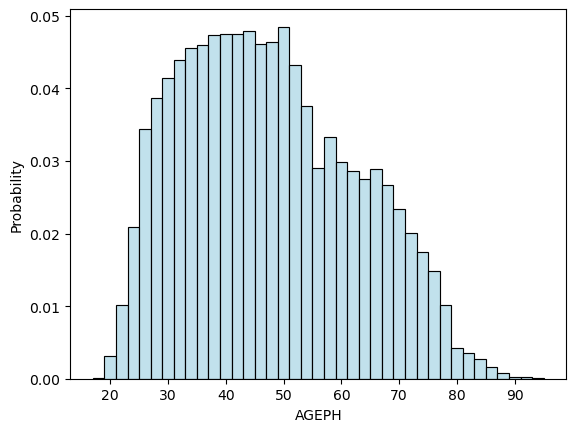

In [98]:
histogram(df, "AGEPH",binwidth=2,relative=True)

<BarContainer object of 79 artists>

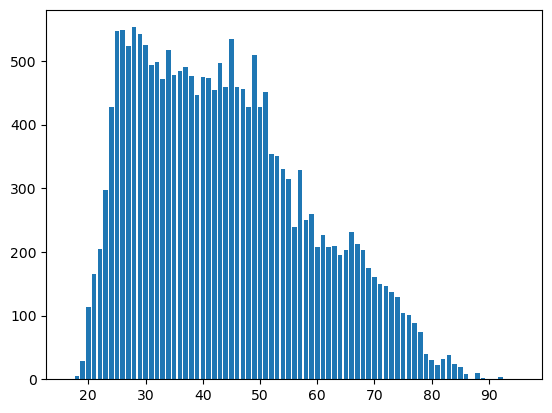

In [100]:
plt.bar(variable['AGEPH'],variable['Total Claims'])
plt